In [3]:
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
except Exception as e:
    print(f"Error al importar pandas: {e}")




Error al importar pandas: No module named 'pandas'


ModuleNotFoundError: No module named 'matplotlib'

In [2]:
#dfs = np.array_split(frauds, 5)
#for i, chunk in enumerate(dfs):
#    chunk.to_csv(f'parte_{i+1}.csv', index=False)
#    print(f'parte_{i+1}.csv guardado con éxito.')

dfs = [pd.read_csv(f'parte_{i}.csv') for i in range(1, 6)]

# Unir todas las partes en un solo DataFrame y guardarlo en la variable 'frauds'
frauds = pd.concat(dfs, ignore_index=True)
frauds.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4235812,306,CASH_OUT,639865.01,C1710542597,84.0,0.0,C1363252477,685356.33,1325221.33,0,0
4187419,305,CASH_OUT,448587.66,C1759478674,11130.0,0.0,C504280911,0.00,448587.66,0,0
2726789,212,PAYMENT,6254.46,C1913335499,916.0,0.0,M402545456,0.00,0.00,0,0
3897856,284,CASH_OUT,138859.04,C1562076033,0.0,0.0,C1775730472,186350.68,325209.72,0,0
4176871,304,CASH_IN,518663.90,C264848618,22127.0,540790.9,C1449321189,0.00,0.00,0,0


# 1. Listado de variables y selección
Por cada variable explicar en una oración el contenido de dicha variable y definir si será utilizada como variable de entrada, de salida, o no será utilizada.

Para la variable de salida especificar los valores posibles que puede tener.

Por cada variable que no se vaya a utilizar, explicar brevemente el motivo.

# Variables de entrada:
Seran utilizadas las variables:

* step : representa una unidad de tiempo en el mundo real. En este caso, 1 paso equivale a 1 hora de tiempo. El total de pasos es 744 (simulación de 30 días).

* type : ENTRADA, SALIDA, DÉBITO, PAGO y TRANSFERENCIA.

* amount : importe de la transacción en moneda local.

* nameOrig : cliente que inició la transacción

* oldbalanceOrg : saldo inicial antes de la transacción

* newbalanceOrig : new balance después de la transacción

* nameDest : cliente que es el destinatario de la transacción

* oldbalanceDest : destinatario del saldo inicial antes de la transacción. No hay información para los clientes que comienzan con M (comerciantes).

* newbalanceDest : destinatario del nuevo saldo después de la transacción. No hay información para los clientes que comienzan con M (comerciantes).

No utilizaremos la variable:

* isFlaggedFraud : variable que intenta detectar intentos ilegales, existen solo 16 registros positivos en la misma por lo cual decidimos no utilizarla ya que no nos aporta ningun valor agregado.
<!-- el modelo de negocio tiene como objetivo controlar las transferencias masivas de una cuenta a otra y marcar los intentos ilegales. Un intento ilegal en este conjunto de datos es un intento de transferir más de 200.000 en una sola transacción. -->

# Variable de salida:

* isFraud : son las transacciones realizadas por agentes fraudulentos dentro de la simulación. En este conjunto de datos específico, el comportamiento fraudulento de los agentes tiene como objetivo obtener ganancias tomando el control de las cuentas de los clientes e intentar vaciar los fondos transfiriéndolos a otra cuenta y luego sacándolos del sistema.


Obtenemos la cantidad de registros con valores fraudes y la cantidad que no son fraude. Posteriormente reamos un gráfico de torta de la distribución de los valores positivos y negativos de nuestra variable de salida, mostrando los porcentajes con tres decimales para verificar el balanceo del dataset

Número de transacciones que son fraude: 8213
Número de transacciones que NO son fraude: 6354407


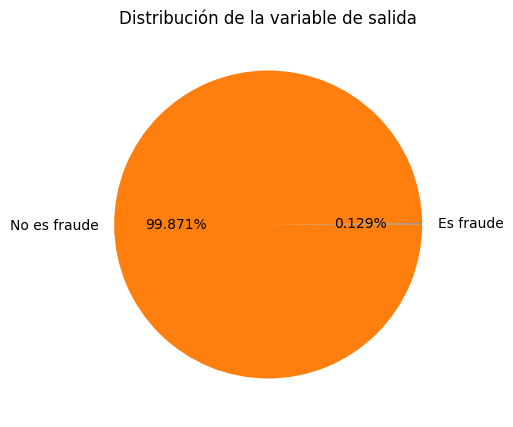

In [14]:
isfraud = (frauds['isFraud'] > 0).sum()
notfraud = (frauds['isFraud'] == 0).sum()

print(f'Número de transacciones que son fraude: {isfraud}')
print(f'Número de transacciones que NO son fraude: {notfraud}')

plt.figure(figsize=(5, 5))
plt.pie([isfraud, notfraud], labels=['Es fraude', 'No es fraude'], autopct='%1.3f%%')
plt.title('Distribución de la variable de salida')

plt.show()

El gráfico muestra el desbalanceo de la variable de salida "fraude" en el conjunto de datos. Como se puede observar, el número de transacciones fraudulentas (8213 instancias) es significativamente menor en comparación con el número de transacciones no fraudulentas (6,354,407 instancias). Esto indica un desbalance notable en el dataset, con una proporción muy baja de fraudes respecto al total de transacciones.

In [16]:
# analisis de valores extremos en las variables:
print("DATOS CUENTA ORIGEN")
print("oldbalanceOrg:\n", frauds.oldbalanceOrg.describe().round(2))
print("---------------------")
print("newbalanceOrig:\n", frauds.newbalanceOrig.describe().round(2))
print("\n")
print("DATOS CUENTA DESTINO")
print("oldbalanceDest:\n", frauds.oldbalanceDest.describe().round(2))
print("---------------------")
print("newbalanceDest:\n", frauds.newbalanceDest.describe().round(2))

DATOS CUENTA ORIGEN
oldbalanceOrg:
 count     6362620.00
mean       833883.10
std       2888242.67
min             0.00
25%             0.00
50%         14208.00
75%        107315.18
max      59585040.37
Name: oldbalanceOrg, dtype: float64
---------------------
newbalanceOrig:
 count     6362620.00
mean       855113.67
std       2924048.50
min             0.00
25%             0.00
50%             0.00
75%        144258.41
max      49585040.37
Name: newbalanceOrig, dtype: float64


DATOS CUENTA DESTINO
oldbalanceDest:
 count    6.362620e+06
mean     1.100702e+06
std      3.399180e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.327057e+05
75%      9.430367e+05
max      3.560159e+08
Name: oldbalanceDest, dtype: float64
---------------------
newbalanceDest:
 count    6.362620e+06
mean     1.224996e+06
std      3.674129e+06
min      0.000000e+00
25%      0.000000e+00
50%      2.146614e+05
75%      1.111909e+06
max      3.561793e+08
Name: newbalanceDest, dtype: float64


In [17]:
frauds_isfraud = frauds[frauds['isFlaggedFraud'] > 0]

isfraudF = (frauds['isFlaggedFraud'] > 0).sum()
notfraudF = (frauds['isFlaggedFraud'] == 0).sum()

print(f'Número de transacciones marcadas como intento ilegal de transacciones: {isfraudF}')
print(f'Número de transacciones NO marcadas como intento ilegal de transacciones: {notfraudF}')

frauds_isfraud.sample(16)

Número de transacciones marcadas como intento ilegal de transacciones: 16
Número de transacciones NO marcadas como intento ilegal de transacciones: 6362604


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6351225,702,TRANSFER,3171085.59,C1892216157,3171085.59,3171085.59,C1308068787,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
6281484,646,TRANSFER,399045.08,C724693370,10399045.08,10399045.08,C1909486199,0.0,0.0,1,1
6362584,741,TRANSFER,5674547.89,C992223106,5674547.89,5674547.89,C1366804249,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1


In [18]:
#vamos a eliminar la columna de la bandera
frauds.drop('isFlaggedFraud', axis=1, inplace=True)

#Data set sin columna isFlaggedFraud
frauds.sample(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
6213806,588,PAYMENT,14458.22,C426237715,701133.00,686674.78,M2070454606,0.00,0.00,0
3007643,232,CASH_OUT,87234.86,C858995697,17154.00,0.00,C1702547592,104244.24,191479.10,0
1867067,164,CASH_IN,95357.48,C628415283,10502299.78,10597657.26,C777039587,590397.32,495039.84,0
3609228,265,CASH_IN,67996.51,C1753096236,626684.00,694680.50,C1103638614,5874583.98,5806587.47,0
2868343,227,CASH_OUT,121749.34,C1780104469,7122.00,0.00,C1880241923,2909958.68,3031708.02,0
6294809,670,CASH_IN,282130.16,C715078350,1376804.23,1658934.39,C763954124,18963883.05,18681752.89,0
6071060,514,CASH_OUT,249723.28,C1105513329,0.00,0.00,C1146609467,624192.45,873915.73,0
2216090,186,CASH_OUT,259930.57,C1159548954,0.00,0.00,C978916365,7850417.80,8110348.37,0
3383462,255,PAYMENT,16521.01,C690949183,32809.00,16287.99,M1365441294,0.00,0.00,0
5403652,377,PAYMENT,20889.37,C2106276085,0.00,0.00,M1357043642,0.00,0.00,0


# Relacion entre variables

*  Relación entre el tipo de transacción (type) y el fraude (isFraud)

Este gráfico muestra la proporción de transacciones fraudulentas y no fraudulentas dentro de cada tipo de transacción, lo que permite una mejor comparación entre las categorías.

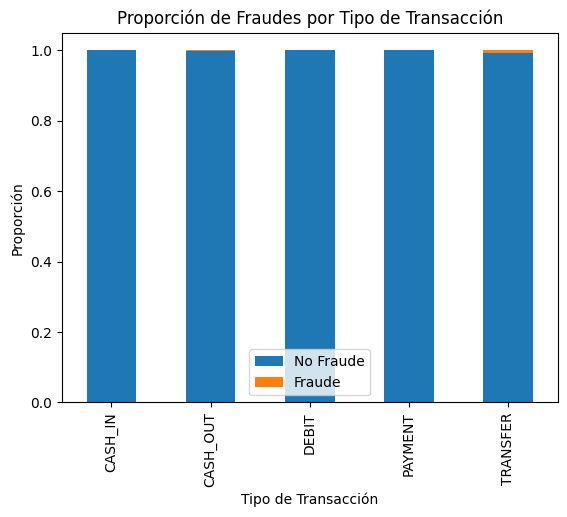

In [20]:
type_fraud = pd.crosstab(frauds['type'], frauds['isFraud'], normalize='index')

# Graficar la proporción de fraudes por tipo de transacción
type_fraud.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Proporción de Fraudes por Tipo de Transacción')
plt.xlabel('Tipo de Transacción')
plt.ylabel('Proporción')
plt.legend(['No Fraude', 'Fraude'], loc='lower center')
plt.show()

* Relación entre el importe de la transacción (amount) y el fraude (isFraud)

El objetivo acá es ver si los montos de las transacciones fraudulentas tienden a ser diferentes de los montos de las transacciones legítimas.

-La línea en el centro de la caja: Representa la mediana del amount para cada categoría (isFraud = 0 o 1).

-Los bordes de la caja: Representan el primer cuartil (Q1) y el tercer cuartil (Q3), lo que cubre el 50% de los valores centrales.


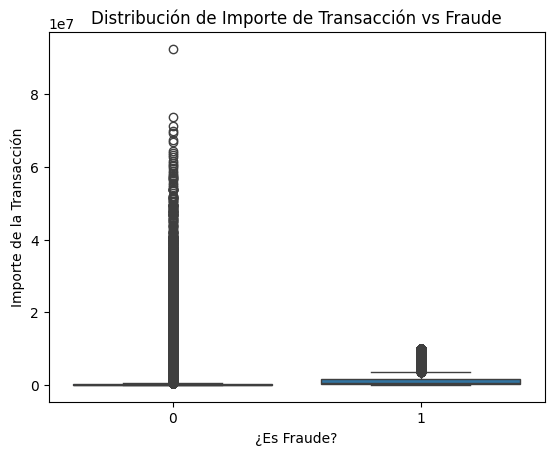

In [21]:
sns.boxplot(x='isFraud', y='amount', data=frauds)
plt.title('Distribución de Importe de Transacción vs Fraude')
plt.xlabel('¿Es Fraude?')
plt.ylabel('Importe de la Transacción')
plt.show()

* Relación entre el saldo antes de la transacción (oldbalanceOrg) y el fraude (isFraud)

Este gráfico se interpreta de manera similar al gráfico anterior, pero ahora se enfoca en el saldo inicial antes de la transacción. Estás buscando si hay patrones en el saldo inicial que puedan estar asociados con fraudes.

Si los boxplots para isFraud = 0 y isFraud = 1 muestran diferencias notables, esto podría indicar que el saldo inicial antes de la transacción es un factor importante para predecir fraudes.

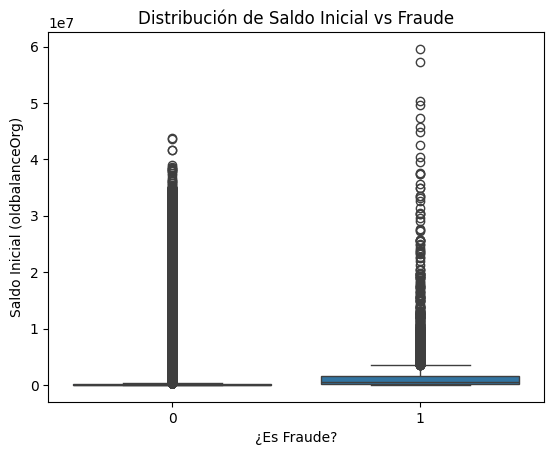

In [23]:
sns.boxplot(x='isFraud', y='oldbalanceOrg', data=frauds)
plt.title('Distribución de Saldo Inicial vs Fraude')
plt.xlabel('¿Es Fraude?')
plt.ylabel('Saldo Inicial (oldbalanceOrg)')
plt.show()

<Axes: title={'center': 'Matriz de Correlación'}>

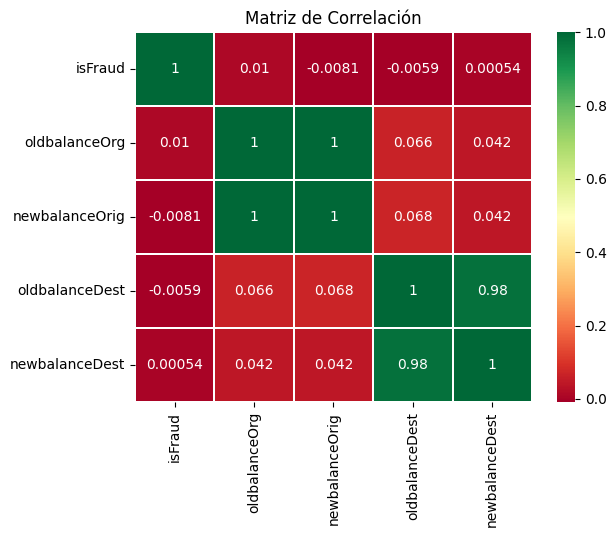

In [24]:
# Lo hacemos con las variables que son de tipo numérica en nuestro dataset y serán utilizadas para el modelo.

columnas_numericas = ['isFraud', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest' ]
plt.title('Matriz de Correlación')
sns.heatmap(frauds[columnas_numericas].corr(), annot=True, cmap='RdYlGn', linewidths=0.2)

Luego de realizar los graficos de relaciones, en el que mostramos la ***Proporción de Fraudes por Tipo de Transacción*** podemos observar que unicamente existen fraudes en la columna **CashOut** y **Transfer**
Para visualizarlo vamos a contar el número de fraudes y no fraudes por cada tipo de transacción y mostrar el resultado.

In [25]:
conteo_fraudes = frauds.groupby(['type', 'isFraud']).size().unstack(fill_value=0)
print(conteo_fraudes)

isFraud         0     1
type                   
CASH_IN   1399284     0
CASH_OUT  2233384  4116
DEBIT       41432     0
PAYMENT   2151495     0
TRANSFER   528812  4097


Como consecuencia de esto, vamos a actualizar nuestro dataset para que unicamente queden las columnas de **CASH OUT** Y **TRANSFER** para que no nos interfiera en el entrenamiento de nuestros modelos. Por ejemplo, algo que podria pasar es que el modelo aprenda que cada vez que el type sea CASH_IN, DEBIT o PAYMENT el resultado para la salida isFraud sea el mismo, es decir, 0. Esto seria negativo ya que el modelo estaria overfiteando.  

In [26]:
frauds = frauds[~frauds['type'].isin(['DEBIT', 'CASH_IN', 'PAYMENT'])]

# Muestro cuantos registros quedan de cada tipo
print(frauds['type'].value_counts())

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64


Ahora vamos a volver a hacer un conteo y ploteo de las variables de nuestro data set luego de la eliminacion de las filas donde type eran "DEBIT", "CASH_IN", o "PAYMENT".

Número de transacciones que son fraude: 8213
Número de transacciones que NO son fraude: 2762196


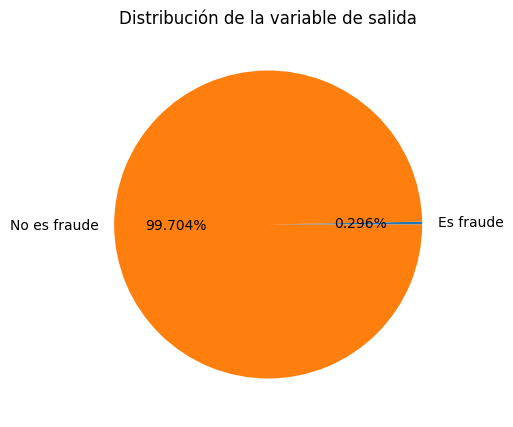

In [27]:
# Obtenemos la cantidad de valores mayores y menores que 0
isfraudNew = (frauds['isFraud'] > 0).sum()
notfraudNew = (frauds['isFraud'] == 0).sum()

print(f'Número de transacciones que son fraude: {isfraudNew}')
print(f'Número de transacciones que NO son fraude: {notfraudNew}')

# Creamos un gráfico de torta de la distribución de los valores positivos y negativos de nuestra variable de salida, mostrando los porcentajes con tres decimales
plt.figure(figsize=(5, 5))
plt.pie([isfraudNew, notfraudNew], labels=['Es fraude', 'No es fraude'], autopct='%1.3f%%')
plt.title('Distribución de la variable de salida')

plt.show()

Luego de esto, volvemos a realizar el grafico de Proporción de Fraudes por Tipo de Transacción, ya que ahora contamos con unicamente las dos columnas con casos positivos de fraude.

Las relaciones de Distribución de Importe de Transacción vs Fraude,  Distribución de Saldo Inicial vs Fraude y Matriz de Correlacion no se vuelven a graficar porque no influye el cambio realizado anteriormente

In [28]:
cash_out = frauds[frauds['type'] == 'CASH_OUT']
transfer = frauds[frauds['type'] == 'TRANSFER']
print("cantidad total de cash out", len(cash_out))
print("Cantidad de cuentas distintas como origen en cash_out" ,cash_out['nameOrig'].nunique())
print("Cantidad de cuentas distintas como destino en cash_out" ,cash_out['nameDest'].nunique())

cash_out_fraud = cash_out[(cash_out['isFraud'] == 1) & (cash_out['newbalanceOrig'] > 0)]
print("Cantidad de cash out donde el origen no queda en cero" , len(cash_out_fraud))

cantidad total de cash out 2237500
Cantidad de cuentas distintas como origen en cash_out 2236357
Cantidad de cuentas distintas como destino en cash_out 488975
Cantidad de cash out donde el origen no queda en cero 1


# Transformación de las variables
Para cada una de las variables de entrada elegidas, explicar si se debería realizar o no alguna transformación para poder utilizarla como entrada de un modelo y por qué.

* step : No necesita transformacion ya que es numérica y representa tiempo en unidades discretas (horas).

* type : Si necesita transformacion, ya que es una variable categórica. La convertiremos en una representación numérica utilizando One-Hot Encoding creando una columna binaria para cada tipo de transacción. Luego de la ultima transformacion se agregaran solo 2 columnas (CASH_OUT y TRASNFER).

* amount : en principio consideramos que no sera necesario aplicar trasnformacion ya que es una variable numérica. En caso de notar una gran dispercion entre los valores, podriamos optar por una transformacion para reducir dicha variabilidad y lograr estabilizar el modelo

* nameOrig : en principio esta columna no nos aporta informacion ya que es representativa del numero de cuenta de cada cliente. Observamos que cada cuenta inicia con una letra diferente, lo que es representativo de un tipo de cliente. Como una FE podriamos obtener que cantidad de veces participo en transacciones (sea de origen o destino) cada cliente.

* oldbalanceOrg : en principio consideramos que no sera necesario aplicar trasnformacion ya que es una variable numérica. El motivo es el mismo que para la variable amount

* newbalanceOrig : en principio consideramos que no sera necesario aplicar trasnformacion ya que es una variable numérica. El motivo es el mismo que para la variable amount y oldbalanceOrg

* nameDest : realizaremos la misma transformacion de la variable nameOrigin. Con la particularidad de que el cliente destino sea participe de una transaccion fraudulenta. (No es lo mismo ser autor de un fraude que ser una víctima)

* oldbalanceDest : en principio consideramos que no sera necesario aplicar trasnformacion ya que es una variable numérica. El motivo es el mismo que para la variable amount

* newbalanceDest : en principio consideramos que no sera necesario aplicar trasnformacion ya que es una variable numérica. El motivo es el mismo que para la variable amount y oldbalanceDest

